<a href="https://colab.research.google.com/github/yeesonmin/Study/blob/main/Deep%20Learning/Do_it_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%EC%8D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 연습

1차원 배열

In [ ]:
my_list = [10, 'hi', 1]
print(my_list[1])


hi


2차원 배열

In [ ]:
my_list2 = [[1,2,3],[1,2,3]]
print(my_list2[1][1])

2


넘파이 임포트

In [ ]:
import numpy as np
print(np.__version__)

1.19.5


넘파이 배열

In [ ]:
myarr = np.array([[10,20,30],[40,50,60]])
print(myarr)

[[10 20 30]
 [40 50 60]]


넘파이 함수사용

In [ ]:
np.sum(myarr)

210

맷플롯립으로 그래프 그리기

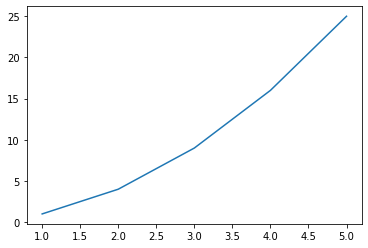

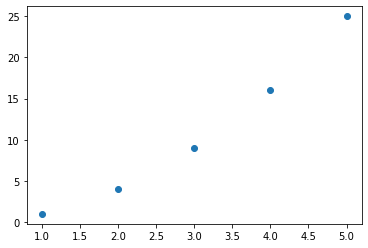

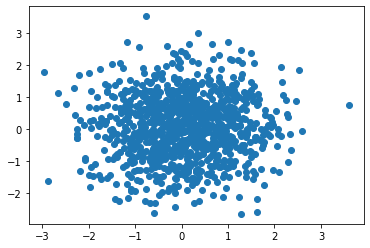

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,],[1,4,9,16,25])
plt.show()

plt.scatter([1,2,3,4,5,],[1,4,9,16,25])
plt.show()

x= np.random.randn(1000)
y=np.random.randn(1000)
plt.scatter(x,y)
plt.show()

# 선형회귀

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape,diabetes.target.shape)





(442, 10) (442,)


In [ ]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

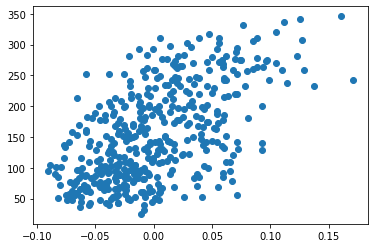

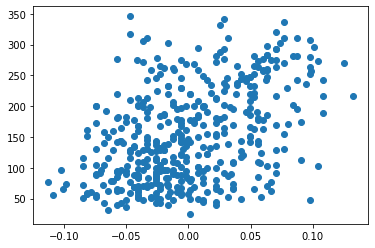

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.show()

plt.scatter(diabetes.data[:,3], diabetes.target)
plt.show()

경사 하강법

In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

w = 1.0
b = 1.0

y_hat = x[0]*w + b
print(y_hat)
print(y[0])

w_inc = w + 0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)
print(y[0])


1.0616962065186886
151.0
1.0678658271705574
151.0


In [ ]:
w_rate = (y_hat_inc - y_hat)/(w_inc - w)
print(w_rate)
print(x[0])

0.061696206518688734
0.0616962065186885


In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

1.1616962065186887


In [ ]:
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate)

1.0


In [ ]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + b_rate*err
print(w_new, b_new)


10.250624555904514 150.9383037934813


In [ ]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new +w_rate*err
b_new = b_new+ b_rate*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


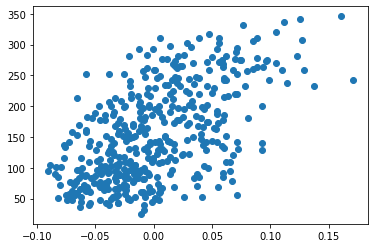

587.8654539985689 99.40935564531424


In [ ]:
x = diabetes.data[:,2]
y = diabetes.target
plt.scatter(x,y)

plt.show()

w = 1.0
b = 1.0

for x1, y1 in zip(x, y):
  y_hat = x1*w+b
  err = y1 - y_hat
  w_rate = x1
  w = w + w_rate*err
  b = b + err

print(w,b)

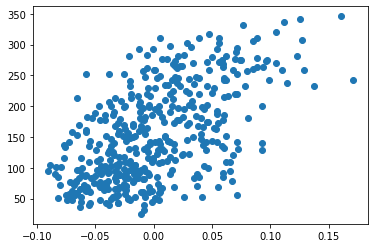

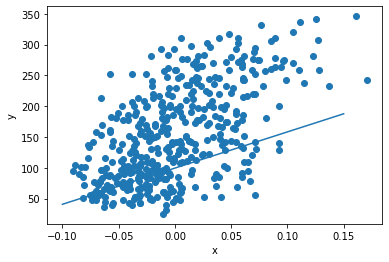

In [ ]:
plt.scatter(x,y)
plt.show()
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

913.5973364345905 123.39414383177204


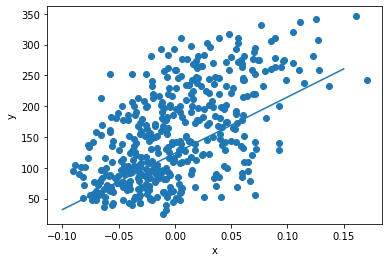

In [ ]:
w = 1.0
b = 1.0

for i in range(1, 100):
  for x1, y1 in zip(x, y):
    y_hat = x1*w+b
    err = y1 - y_hat
    w_rate = x1
    w = w + w_rate*err
    b = b + err

print(w,b)

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

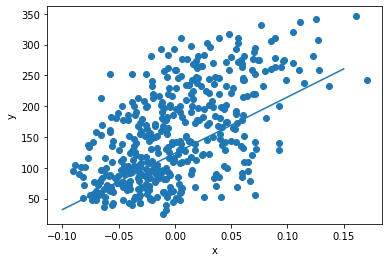

In [ ]:

class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backprop(self, x, err):
    w_grad = x *err
    b_grad = err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x1, y1 in zip(x,y):
        y_hat = self.forpass(x1)
        err = -(y1 - y_hat)
        w_grad, b_grad = self.backprop(x1,err)
        self.w -= w_grad
        self.b -= b_grad

x = diabetes.data[:,2]
y = diabetes.target
neuron = Neuron()
neuron.fit(x,y)


plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 선형회귀 직접 구현

In [10]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diabetes = load_diabetes()
x = diabetes.data[:,2]
y = diabetes.target

class Study:
  #1. 초기화
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
  
  #2. 예측값 계산 (정방향 계산)
  def Calculate(self, x):
    yhat = self.w * x + self.b
    return yhat

  #3. 손실함수 및 w,b 업데이트 (역방향 계산)
  def Update(self, x, err):
    uw = x * err
    ub = err
    return uw, ub

  #4. 훈련
  def Trainning(self,x, y, epochs = 100):
    for i in range(epochs):
      for xi, yi in zip(x,y):
        yhat = self.Calculate(xi)
        err = -(yi - yhat)
        uw, ub = self.Update(xi, err)
        self.w -= uw
        self.b -= ub




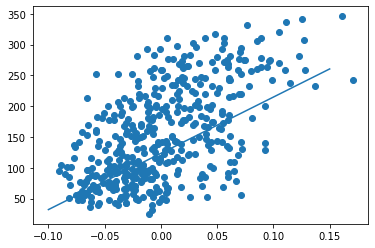

In [11]:
test = Study()
test.Trainning(x,y)

plt.scatter(x,y)
pt1 = (-0.1, -0.1*test.w + test.b)
pt2 = (0.15, 0.15*test.w + test.b)

plt.plot([pt1[0], pt2[0]], [pt1[1],pt2[1]])
plt.show()



# 이진분류

유방암 분류

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[:3]


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

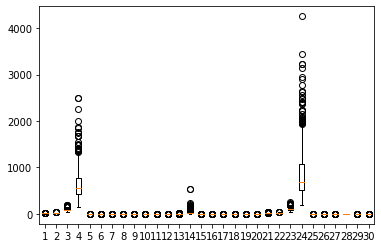

In [ ]:
plt.boxplot(cancer.data)
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

훈련데이터 및 데스트 데이터 분류

In [ ]:
from sklearn.model_selection import  train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y,test_size=0.2,random_state=42)
print(xtrain.shape,xtest.shape)
np.unique(ytrain, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

로지스틱 회귀 구현하기

In [ ]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
    

  def forpass(self,x):
    z= self.b + np.sum(x * self.w)
    return z
  
  def backrop(self, x, err):
    wgrad = x*err
    bgrad = err
    return wgrad, bgrad
  
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for xi,yi in zip(x,y):
        z = self.forpass(xi)
        a = self.activation(z)
        err = -(yi - a)
        wgrad, bgrad = self.backrop(xi,err)
        self.w -= wgrad
        self.b -= bgrad
  
  def activation(self, z):
    a = 1 / (1+ np.exp(-z))
    return a
  
  def predict(self, x):
    z = [self.forpass(xi) for xi in x]
    a = self.activation(np.array(z))
    return a > 0.5


In [ ]:
neuron = LogisticNeuron()
neuron.fit(xtrain, ytrain)

np.mean(neuron.predict(xtest)==ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


0.8245614035087719

단을층 신경망 구현

In [ ]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self,x):
    z= self.b + np.sum(x * self.w)
    return z
  
  def backrop(self, x, err):
    wgrad = x*err
    bgrad = err
    return wgrad, bgrad
  
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        wgrad, bgrad = self.backrop(x[i],err)
        self.w -= wgrad
        self.b -= bgrad
        a =np.clip(a, 1e-10, 1-1e-10)
        loss += - (y[i]* np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))
  
  def activation(self, z):
    a = 1 / (1+ np.exp(-z))
    return a
  
  def predict(self, x):
    z = [self.forpass(xi) for xi in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y) 

In [ ]:
layer = SingleLayer()
layer.fit(xtrain,ytrain)
layer.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


0.9473684210526315

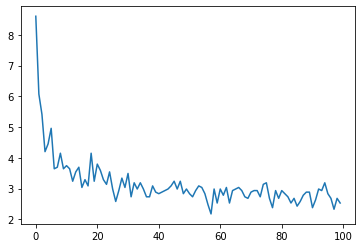

In [ ]:
plt.plot(layer.losses)
plt.show()

사이킷런으로 로지스틱 회귀 구현

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter=100, tol = 1e-3, random_state=42)

sgd.fit(xtrain, ytrain)
print(sgd.score(xtest, ytest))
print(sgd.predict(xtest[0:10]))

0.8333333333333334
[0 1 0 0 0 0 1 0 0 0]


# 훈련방법

전처리 과정

In [ ]:
from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import  train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(xtrain,ytrain)
print(sgd.score(xtest,ytest))

sgd = SGDClassifier(loss = 'hinge', random_state = 42)
sgd.fit(xtrain,ytrain)
print(sgd.score(xtest,ytest))


0.8333333333333334
0.9385964912280702


검증세트 준비

In [ ]:
from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import  train_test_split

#데이터 세트 준비
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
xtrainall, xtest, ytrainall, ytest = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

#검증세트 분할
xtrain, xval, ytrain, yval = train_test_split(xtrainall, ytrainall, stratify=ytrainall, test_size=0.2, random_state=42)

#모델 평가
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(xtrain,ytrain)
print(sgd.score(xval,yval))

0.6923076923076923


스케일 조정(스케일 전처리)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_histroy = []
    self.lr = learning_rate

  def forpass(self,x):
    z= self.b + np.sum(x * self.w)
    return z
  
  def backrop(self, x, err):
    wgrad = x*err
    bgrad = err
    return wgrad, bgrad
  
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_histroy.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        wgrad, bgrad = self.backrop(x[i],err)
        self.w -= wgrad
        self.b -= bgrad
        self.w_histroy.append(self.w.copy())
        a =np.clip(a, 1e-10, 1-1e-10)
        loss += - (y[i]* np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))
  
  def activation(self, z):
    a = 1 / (1+ np.exp(-z))
    return a
  
  def predict(self, x):
    z = [self.forpass(xi) for xi in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y) 

In [ ]:
layer1 = SingleLayer()
layer1.fit(xtrain, ytrain)
layer1.score(xval,yval)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


0.9120879120879121

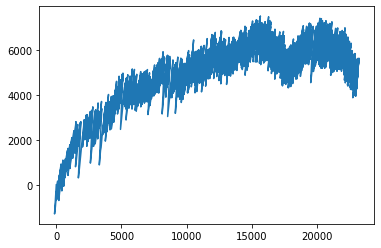

In [ ]:
w2 = []
w3 = []
for w in layer1.w_histroy:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.show()
#스케일 조정 필요

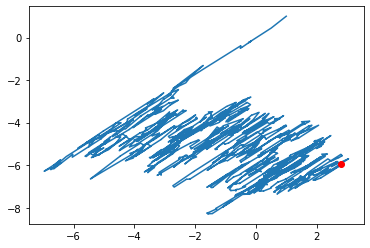

0.37362637362637363
0.9560439560439561


In [ ]:
#표준편차로 스케일 조정
train_mean = np.mean(xtrain,axis=0)
train_std = np.std(xtrain,axis=0)

xtrain_scaled = (xtrain - train_mean)/train_std

#모델 훈련
layer2 = SingleLayer()
layer2.fit(xtrain_scaled, ytrain)

w2 = []
w3 = []
for w in layer2.w_histroy:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'ro')
plt.show()

#평가
print(layer2.score(xval, yval))

#전처리 적용
val_mean = np.mean(xval,axis=0)
val_std = np.std(xval,axis=0)
xval_scaled = (xval - val_mean)/val_std
print(layer2.score(xval_scaled, yval))

스케일 조정 실수(올바르게 검증 세트 전처리)

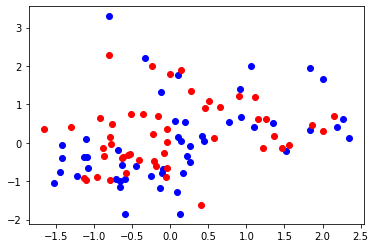

0.967032967032967


In [ ]:
xval_scaled = (xval - train_mean)/ train_std
plt.plot(xtrain_scaled[:50,0], xtrain_scaled[:50,1],'bo')
plt.plot(xval_scaled[:50,0], xval_scaled[:50,1],'ro')
plt.show()

#평가
print(layer2.score(xval_scaled, yval))